# Total Variation Loss

In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, L_BFGS, Adam
from neural_stylization.util.build_callback import build_callback

In [3]:
ITERATIONS = 50

## Inputs

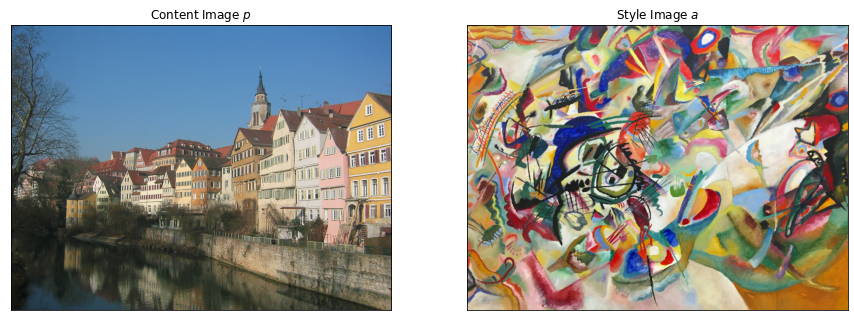

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
content = io.imread('img/content/tubingen.jpg')
ax = plt.imshow(content)
plt.title('Content Image $p$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.subplot(1, 2, 2)
style = io.imread('img/styles/composition-vii.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
plt.title('Style Image $a$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## TV loss = $0$

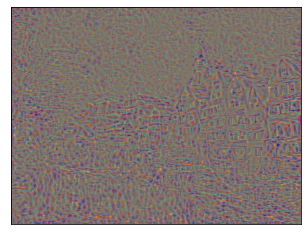

100%|██████████| 3/3 [01:04<00:00, 21.54s/it]


In [6]:
output = Stylizer(content_weight=1, style_weight=1e4)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=build_callback('build/tv/0')
)
io.imsave('img/tv/0.png', output)

## TV loss = $1$

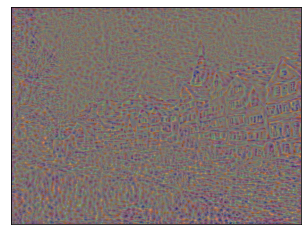

100%|██████████| 3/3 [00:55<00:00, 18.63s/it]


In [7]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=1)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=build_callback('build/tv/1')
)
io.imsave('img/tv/1.png', output)

## TV loss = $10$

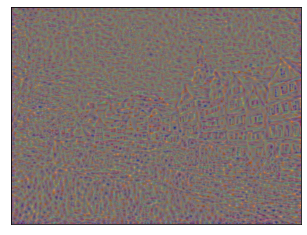

100%|██████████| 3/3 [00:56<00:00, 18.95s/it]


In [8]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=10)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=build_callback('build/tv/10')
)
io.imsave('img/tv/10.png', output)

## TV loss = $100$

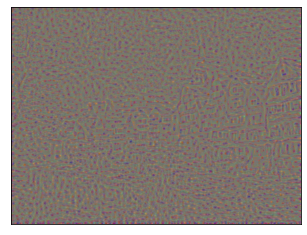

100%|██████████| 3/3 [00:57<00:00, 19.26s/it]


In [9]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=100)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=build_callback('build/tv/100')
)
io.imsave('img/tv/100.png', output)

## TV loss = $1000$

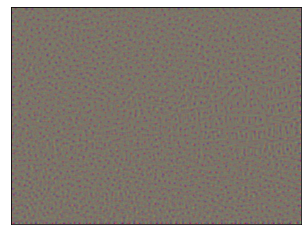

100%|██████████| 3/3 [00:55<00:00, 18.54s/it]


In [10]:
output = Stylizer(content_weight=1, style_weight=1e4, total_variation_weight=1000)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=build_callback('build/tv/1000')
)
io.imsave('img/tv/1000.png', output)